In [1]:
from keras.models import Sequential
from keras.layers import Dense
from keras.models import model_from_json
import numpy
import os

Using TensorFlow backend.
/home/svp/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/svp/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/svp/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/svp/.local/lib/python3.6/site-packages/tensorflow/python/framework/d

In [47]:
import pandas as pd
import numpy as  np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

from keras.utils.np_utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense,Conv2D,Flatten,MaxPool2D,Dropout,BatchNormalization
from keras.optimizers import RMSprop,Adam
from keras.callbacks import ReduceLROnPlateau

In [48]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(5, 5), activation='relu', input_shape=((28, 28, 1)) ))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))

model.add(BatchNormalization(momentum=0.15))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 24, 24, 32)        832       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 22, 22, 64)        18496     
_________________________________________________________________
batch_normalization_2 (Batch (None, 22, 22, 64)        256       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 11, 11, 64)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 11, 11, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 7744)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)              

In [49]:
model.load_weights("model.h5")

# Convolutional Filters learnt by CNN

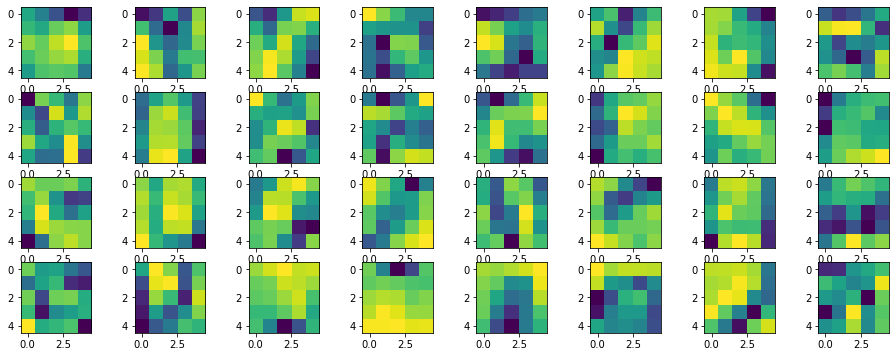

In [56]:
f, ax = plt.subplots(4, 8, figsize=(16, 6))

for i in range(32):
    ax[int(i/8), i%8].imshow(model.layers[0].get_weights()[0][:,:,:,i][:,:,0])

# Input Image : Digit 3

In [129]:
input_3 = pd.read_csv('Kannada-MNIST/train.csv')
input_3 = input_3[input_3['label']==2]
input_3 = input_3.drop(['label'], axis=1)
input_3 = input_3.reset_index(drop=True)

In [130]:
input_3.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


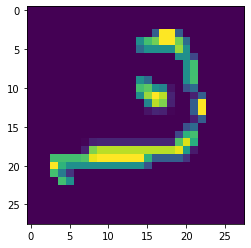

In [131]:
img1 = np.array(input_3.iloc[0])
img1 = img1.reshape(28, 28)
plt.imshow(img1)

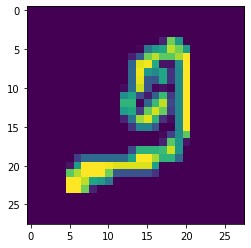

In [142]:
img2 = np.array(input_3.iloc[3])
img2 = img2.reshape(28, 28)
plt.imshow(img2)

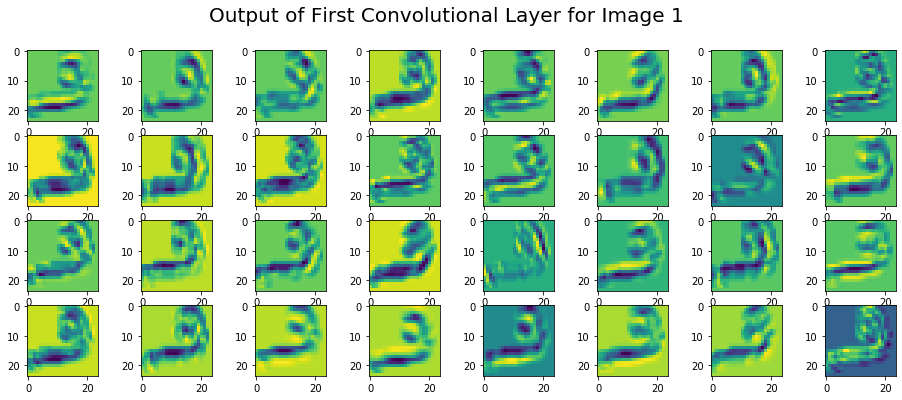

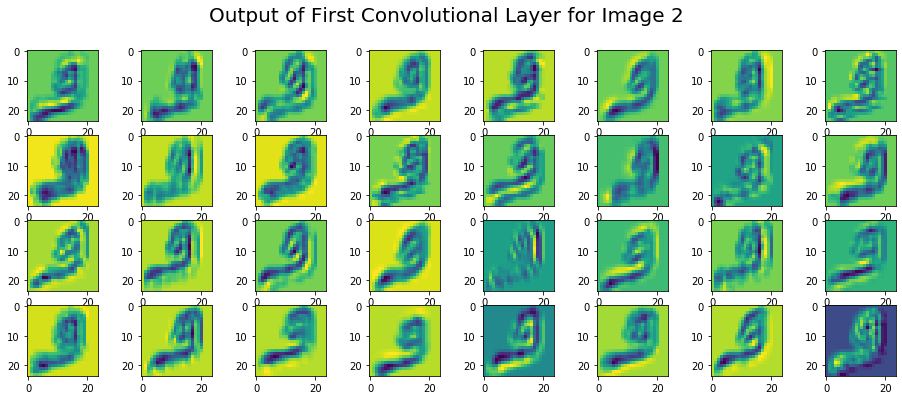

In [146]:
for i, img in enumerate([img1, img2]):
    f, ax = plt.subplots(4, 8, figsize=(16, 6))
    fig = plt.gcf()
    fig.suptitle(f'Output of First Convolutional Layer for Image {i+1}', fontsize=20)
    for i in range(32):
        filter = model.layers[0].get_weights()[0][:,:,:,i][:,:,0]
        convoluted = np.zeros((24, 24))
        for x in range(img.shape[0]-4):
            for y in range(img.shape[1]-4):
                region = img[x:x+5, y:y+5]
                convoluted[x, y] = np.sum(np.multiply(region, filter))
        ax[int(i/8), i%8].imshow(convoluted)

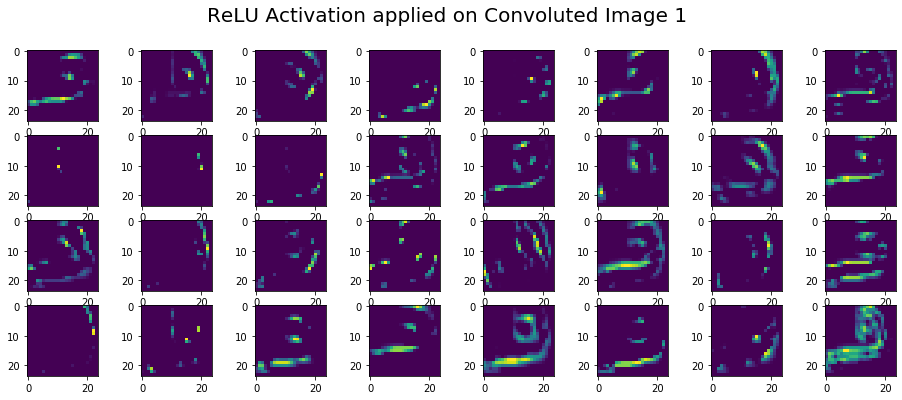

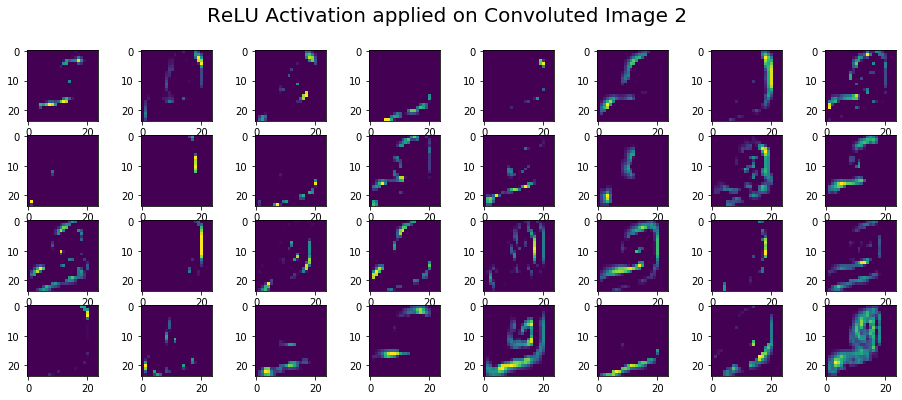

In [150]:
# ReLU Activation Function
relu = lambda x: x * (x > 0)

for i, img in enumerate([img1, img2]):
    f, ax = plt.subplots(4, 8, figsize=(16, 6))
    fig = plt.gcf()
    fig.suptitle(f'ReLU Activation applied on Convoluted Image {i+1}', fontsize=20)
    for i in range(32):
        filter = model.layers[0].get_weights()[0][:,:,:,i][:,:,0]
        convoluted = np.zeros((24, 24))
        for x in range(img.shape[0]-4):
            for y in range(img.shape[1]-4):
                region = img[x:x+5, y:y+5]
                convoluted[x, y] = relu(np.sum(np.multiply(region, filter)))
        ax[int(i/8), i%8].imshow(convoluted)

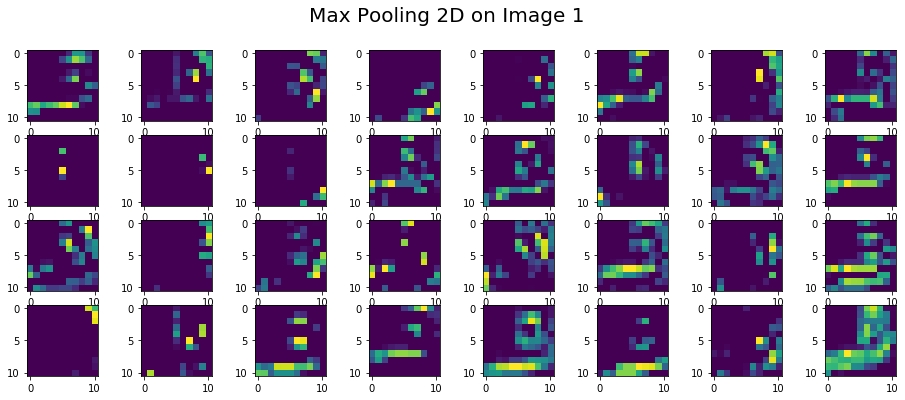

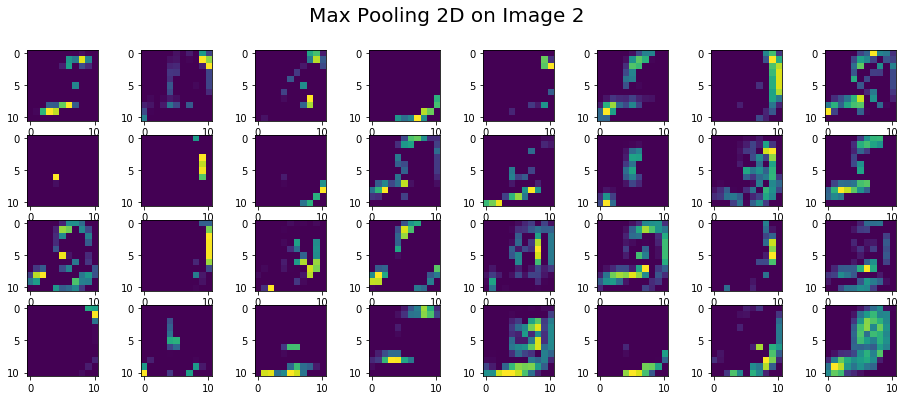

In [155]:
# ReLU Activation Function
relu = lambda x: x * (x > 0)

for i, img in enumerate([img1, img2]):
    f, ax = plt.subplots(4, 8, figsize=(16, 6))
    fig = plt.gcf()
    fig.suptitle(f'Max Pooling 2D on Image {i+1}', fontsize=20)
    for i in range(32):
        filter = model.layers[0].get_weights()[0][:,:,:,i][:,:,0]
        convoluted = np.zeros((24, 24))
        for x in range(img.shape[0]-4):
            for y in range(img.shape[1]-4):
                region = img[x:x+5, y:y+5]
                convoluted[x, y] = relu(np.sum(np.multiply(region, filter)))
        
        pooled = np.zeros((11, 11))
        for x in range(11):
            for y in range(11):
                pooled[x, y] = np.max(convoluted[2*x:2*x+2, 2*y:2*y+2])
        
        ax[int(i/8), i%8].imshow(pooled)